# Data Viewing and Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv(r'D:\Augustana University\Courses\5. Spring 2020\COSC 380-A Artificial Intelligence & Robotics\Projects\Final Project\Final Final\weatherAUS.csv')

In [2]:
df.shape

(145460, 24)

In [3]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


**Date**: The date of observation<br/>
**Location:** The common name of the location of the weather station<br/>
**MinTemp:** The minimum temperature in degrees celsius<br/>
**MaxTemp:** The maximum temperature in degrees celsius<br/>
**Rainfall:** The amount of rainfall recorded for the day in mm<br/>
**Evaporation:** The so-called Class A pan evaporation (mm) in the 24 hours to 9am<br/>
**Sunshine:** The number of hours of bright sunshine in the day.<br/>
**WindGustDir:** The direction of the strongest wind gust in the 24 hours to midnight<br/>
**WindGustSpeed:** The speed (km/h) of the strongest wind gust in the 24 hours to midnight<br/>
**WindDir9am:** Direction of the wind at 9am<br/>
**WindDir3pm:** Direction of the wind at 3pm<br/>
**WindSpeed9am:** Wind speed (km/hr) averaged over 10 minutes prior to 9am<br/>
**WindSpeed3pm:** Wind speed (km/hr) averaged over 10 minutes prior to 3pm<br/>
**Humidity9am:** Humidity (percent) at 9am<br/>
**Humidity3pm:** Humidity (percent) at 3pm<br/>
**Pressure9am:** Atmospheric pressure (hpa) reduced to mean sea level at 9am<br/>
**Pressure3pm:** Atmospheric pressure (hpa) reduced to mean sea level at 3pm<br/>
**Cloud9am:** Fraction of sky obscured by cloud at 9am. This is measured in oktas, which are a unit of eigths. It records how many<br/>
**Cloud3pm:** Fraction of sky obscured by cloud at 3pm. This is measured in oktas, which are a unit of eigths. It records how many<br/>
**Temp9am:** Temperature (degrees C) at 9am<br/>
**Temp3pm:** Temperature (degrees C) at 9am<br/>
**RainToday:** Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0<br/>
**RISK_MM:** The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".<br/>
**RainTomorrow:** The target variable. Did it rain tomorrow?<br/>

In [4]:
df['Location'].unique().size

49

In [5]:
max(df['Date'])

'2017-06-25'

In [6]:
df['Date'].unique().size

3436

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142193.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2.360682
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,371.000000


In [8]:
df[df['Rainfall'] == 371]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
9368,2009-11-07,CoffsHarbour,17.4,23.1,371.0,NaN,3.5,NaN,NaN,SW,...,81.0,1026.6,1025.9,8.0,5.0,18.6,22.0,Yes,4.8,Yes


In [9]:
df.drop(labels = ['Date', 'Location'], axis = 1, inplace = True)

In [10]:
# Replacing Yes by 1 and No by 0 for RainToday and RainTomorrow columns

df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [11]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [12]:
df['WindGustDir'].replace({'W': 1, 'WNW': 2, 'WSW': 3, 'NE': 4, 'NNW':5, 'N':6, 'NNE': 7, 'SW': 8,
                          'ENE':9, 'SSE': 10, 'S': 11, 'NW': 12, 'SE':13, 'ESE':14,
                          'E': 15, 'SSW':16}, inplace = True)

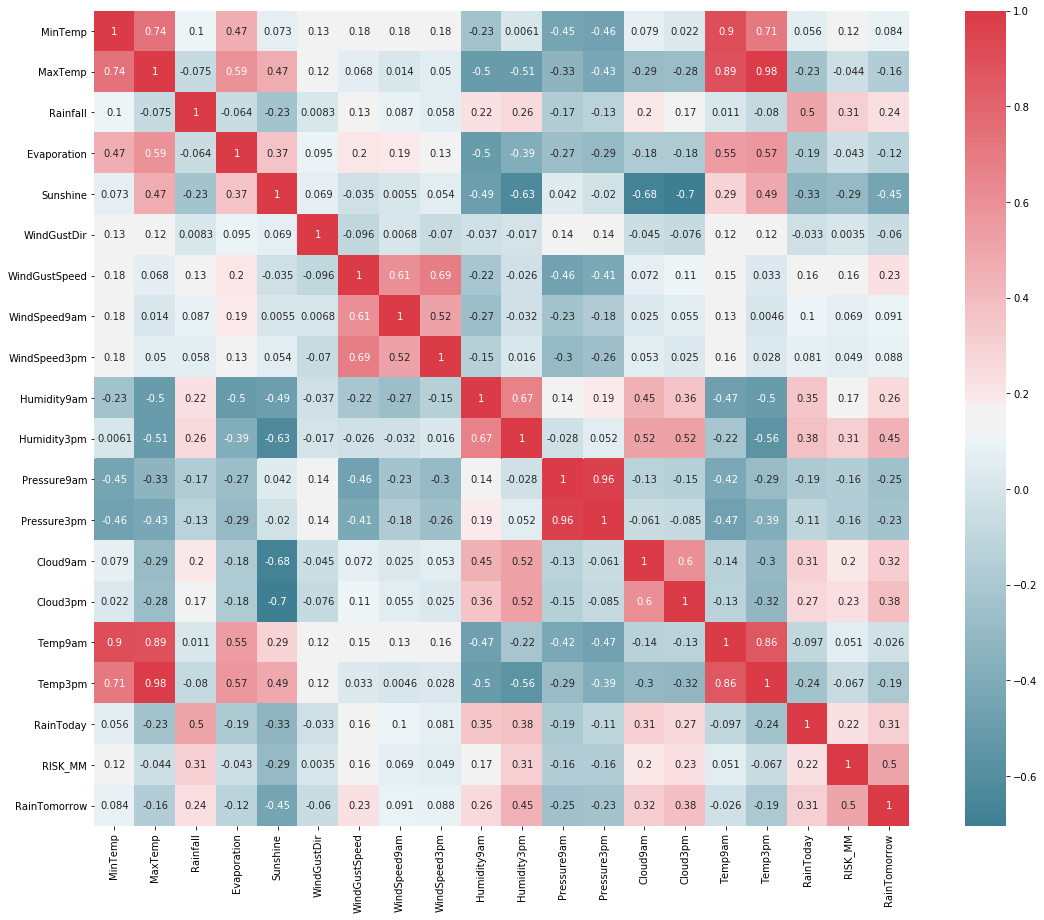

In [13]:
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

In [14]:
# Getting rid of the columns with the least correlation with RainTomorrow (so between -0.20 and +0.20)

df.drop(labels = ['MinTemp', 'MaxTemp', 'Evaporation', 'WindGustDir',
                  'WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Temp3pm'], axis = 1, inplace = True)

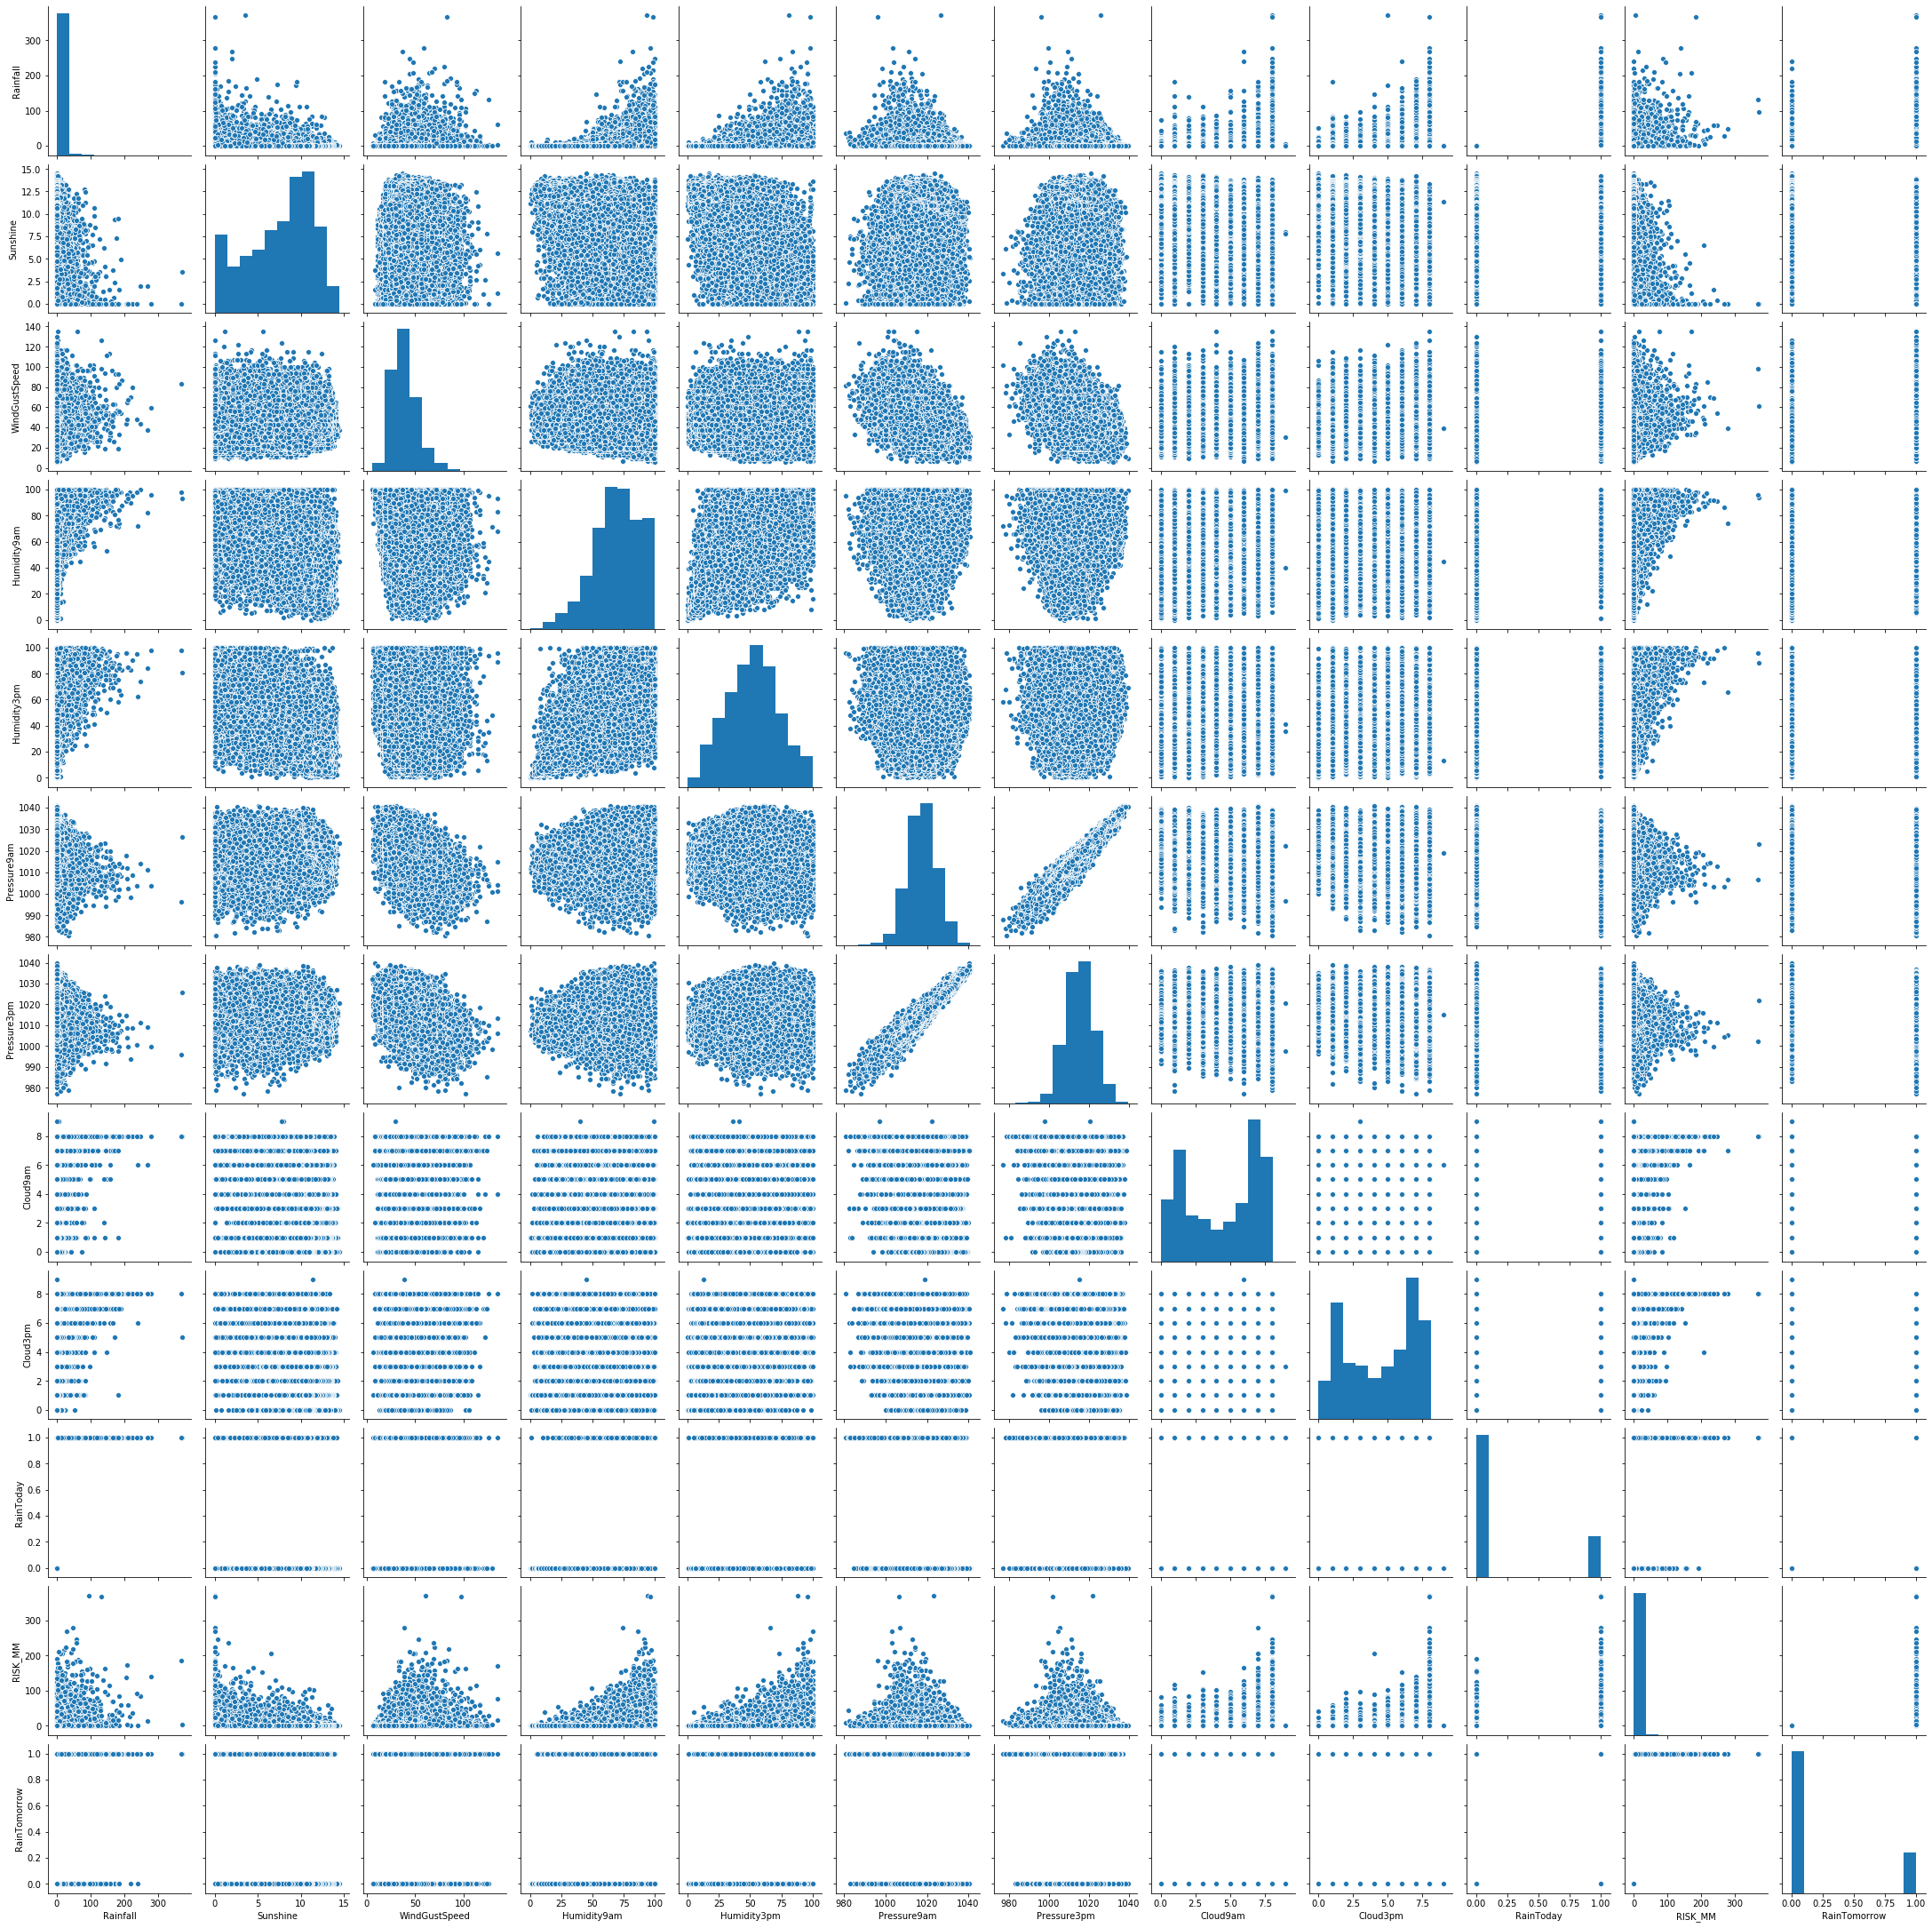

In [15]:
sns.pairplot(df)

In [16]:
df.isnull().sum().sort_values()

Humidity9am       2654
Rainfall          3261
RainToday         3261
RISK_MM           3267
RainTomorrow      3267
WindDir3pm        4228
Humidity3pm       4507
WindGustSpeed    10263
WindDir9am       10566
Pressure3pm      15028
Pressure9am      15065
Cloud9am         55888
Cloud3pm         59358
Sunshine         69835
dtype: int64

In [17]:
categorical = ['WindDir3pm', 'WindDir9am']

In [18]:
df.shape

(145460, 14)

In [19]:
# Adding dummy variables for categorical predictors

df = pd.get_dummies(df, columns = categorical, drop_first = True)

In [20]:
df.shape

(145460, 42)

In [21]:
df

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0.6,NaN,44.0,71.0,22.0,1007.7,1007.1,8.0,NaN,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,NaN,44.0,44.0,25.0,1010.6,1007.8,NaN,NaN,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,NaN,46.0,38.0,30.0,1007.6,1008.7,NaN,2.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,NaN,24.0,45.0,16.0,1017.6,1012.8,NaN,NaN,0.0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,NaN,41.0,82.0,33.0,1010.8,1006.0,7.0,8.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.0,NaN,31.0,51.0,24.0,1024.6,1020.3,NaN,NaN,0.0,...,0,0,0,1,0,0,0,0,0,0
145456,0.0,NaN,22.0,56.0,21.0,1023.5,1019.1,NaN,NaN,0.0,...,0,0,0,1,0,0,0,0,0,0
145457,0.0,NaN,37.0,53.0,24.0,1021.0,1016.8,NaN,NaN,0.0,...,0,0,0,1,0,0,0,0,0,0
145458,0.0,NaN,28.0,51.0,24.0,1019.4,1016.5,3.0,2.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
df.shape

(145460, 42)

In [23]:
# Getting rid of nan values

df = df.dropna(how = 'any')
df.shape

(60066, 42)

In [24]:
df

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
6049,0.0,12.3,48.0,20.0,13.0,1006.3,1004.4,2.0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6050,0.0,13.0,37.0,30.0,8.0,1012.9,1012.1,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
6052,0.0,10.6,46.0,42.0,22.0,1012.3,1009.2,1.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6053,0.0,12.2,31.0,37.0,22.0,1012.7,1009.1,1.0,5.0,0.0,...,0,0,0,0,0,0,0,0,1,0
6054,0.0,8.4,35.0,19.0,15.0,1010.7,1007.4,1.0,6.0,0.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,0.0,11.0,35.0,63.0,32.0,1013.9,1010.5,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
142299,0.0,8.6,37.0,56.0,28.0,1014.6,1011.2,7.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
142300,0.0,11.0,33.0,46.0,23.0,1015.3,1011.8,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
142301,0.0,10.6,26.0,62.0,58.0,1014.9,1010.7,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
from sklearn import preprocessing

scale = preprocessing.MinMaxScaler()
scale.fit(df)

df = pd.DataFrame(scale.transform(df), index = df.index, columns = df.columns)

In [26]:
df.head(10)

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
6049,0.0,0.848276,0.333333,0.20,0.13,0.430718,0.441748,0.250,0.555556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6050,0.0,0.896552,0.239316,0.30,0.08,0.540902,0.566343,0.125,0.111111,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6052,0.0,0.731034,0.316239,0.42,0.22,0.530885,0.519417,0.125,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6053,0.0,0.841379,0.188034,0.37,0.22,0.537563,0.517799,0.125,0.555556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6054,0.0,0.579310,0.222222,0.19,0.15,0.504174,0.490291,0.125,0.666667,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6055,0.0,0.000000,0.290598,0.26,0.19,0.454090,0.490291,1.000,0.888889,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6056,0.0,0.868966,0.273504,0.33,0.15,0.514190,0.530744,0.375,0.111111,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6057,0.0,0.910345,0.239316,0.25,0.09,0.547579,0.519417,0.125,0.111111,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6058,0.0,0.848276,0.333333,0.46,0.28,0.464107,0.435275,0.125,0.555556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6059,0.0,0.875862,0.273504,0.61,0.14,0.457429,0.464401,0.125,0.555556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df.columns

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'RISK_MM', 'RainTomorrow', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
       'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW',
       'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW',
       'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW'],
      dtype='object')

In [28]:
X = df.drop(labels = ['RainTomorrow'], axis = 1)
X

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
6049,0.0,0.848276,0.333333,0.20,0.13,0.430718,0.441748,0.250,0.555556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6050,0.0,0.896552,0.239316,0.30,0.08,0.540902,0.566343,0.125,0.111111,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6052,0.0,0.731034,0.316239,0.42,0.22,0.530885,0.519417,0.125,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6053,0.0,0.841379,0.188034,0.37,0.22,0.537563,0.517799,0.125,0.555556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6054,0.0,0.579310,0.222222,0.19,0.15,0.504174,0.490291,0.125,0.666667,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,0.0,0.758621,0.222222,0.63,0.32,0.557596,0.540453,0.000,0.111111,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
142299,0.0,0.593103,0.239316,0.56,0.28,0.569282,0.551780,0.875,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
142300,0.0,0.758621,0.205128,0.46,0.23,0.580968,0.561489,0.000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142301,0.0,0.731034,0.145299,0.62,0.58,0.574290,0.543689,0.125,0.111111,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
y = df['RainTomorrow']
y

6049      0.0
6050      0.0
6052      0.0
6053      0.0
6054      0.0
         ... 
142298    0.0
142299    0.0
142300    0.0
142301    0.0
142302    0.0
Name: RainTomorrow, Length: 60066, dtype: float64

In [30]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [31]:
X_train.shape

(38441, 41)

In [32]:
X_test.shape

(12014, 41)

In [33]:
X_val.shape

(9611, 41)

In [34]:
# Dimension Reduction to keep 95% of the variance. Reducing 16 variables!

from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
X_train = pca.fit_transform(X_train)

X_test = pca.transform(X_test)

In [35]:
X_train.shape

(38441, 31)

In [36]:
X_test.shape

(12014, 31)

# Models

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

X_train_pred = model_lr.predict(X_train)
confusion_matrix(y_train, X_train_pred)

array([[27934,  1971],
       [ 4613,  3923]], dtype=int64)

In [38]:
accuracy_lr_train = accuracy_score(y_train, X_train_pred)
print("accuracy on training set: ", accuracy_lr_train)

accuracy on training set:  0.8287245389037746


In [39]:
X_test_pred = model_lr.predict(X_test)
confusion_matrix(y_test, X_test_pred)

array([[8808,  611],
       [1484, 1111]], dtype=int64)

In [40]:
accuracy_lr_test = accuracy_score(y_test, X_test_pred)
print("accuracy on test set: ", accuracy_lr_test)

accuracy on test set:  0.8256201098718162


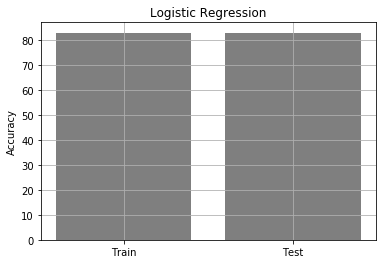

In [41]:
import matplotlib.pyplot as plt

models = ('Train', 'Test')
y_pos = np.arange(len(models))
accuracy = [accuracy_lr_train*100, accuracy_lr_test*100]

plt.bar(y_pos, accuracy, align='center', alpha=0.5, color = 'black')
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')
plt.title('Logistic Regression')
plt.grid(True)

plt.show()

### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators=100, random_state=42)
model_rfc.fit(X_train, y_train)

X_train_pred = model_rfc.predict(X_train)
confusion_matrix(y_train, X_train_pred)

array([[29905,     0],
       [    1,  8535]], dtype=int64)

In [43]:
accuracy_rfc_train = accuracy_score(y_train, X_train_pred)
print("accuracy on training set: ", accuracy_rfc_train)

accuracy on training set:  0.999973986108582


In [44]:
X_test_pred = model_rfc.predict(X_test)
confusion_matrix(y_test, X_test_pred)

array([[8808,  611],
       [1437, 1158]], dtype=int64)

In [45]:
accuracy_rfc_test = accuracy_score(y_test, X_test_pred)
print("accuracy on test set: ", accuracy_rfc_test)

accuracy on test set:  0.8295322124188447


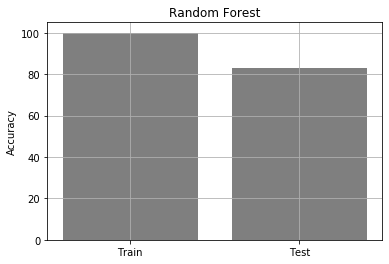

In [46]:
models = ('Train', 'Test')
y_pos = np.arange(len(models))
accuracy = [accuracy_rfc_train*100, accuracy_rfc_test*100]

plt.bar(y_pos, accuracy, align='center', alpha=0.5, color = 'black')
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')
plt.title('Random Forest')
plt.grid(True)

plt.show()

### Support Vector Machine

In [47]:
from sklearn import svm

model_svm = clf_svc = svm.SVC(kernel = 'linear')
model_svm.fit(X_train, y_train)

X_train_pred = model_svm.predict(X_train)
confusion_matrix(y_train, X_train_pred)

array([[28134,  1771],
       [ 4976,  3560]], dtype=int64)

In [48]:
accuracy_svm_train = accuracy_score(y_train, X_train_pred)
print("accuracy on training set: ", accuracy_svm_train)

accuracy on training set:  0.8244842746026378


In [49]:
X_test_pred = model_svm.predict(X_test)
confusion_matrix(y_test, X_test_pred)

array([[8885,  534],
       [1605,  990]], dtype=int64)

In [50]:
accuracy_svm_test = accuracy_score(y_test, X_test_pred)
print("accuracy on test set: ", accuracy_svm_test)

accuracy on test set:  0.8219577159980024


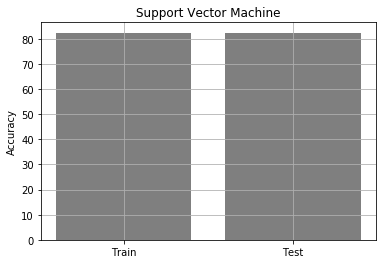

In [51]:
models = ('Train', 'Test')
y_pos = np.arange(len(models))
accuracy = [accuracy_svm_train*100, accuracy_svm_test*100]

plt.bar(y_pos, accuracy, align='center', alpha=0.5, color = 'black')
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')
plt.title('Support Vector Machine')
plt.grid(True)

plt.show()

### Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state = 42)
model_dt.fit(X_train, y_train)

X_train_pred = model_dt.predict(X_train)
confusion_matrix(y_train, X_train_pred)

array([[29905,     0],
       [    0,  8536]], dtype=int64)

In [53]:
accuracy_dt_train = accuracy_score(y_train, X_train_pred)
print("accuracy on training set: ", accuracy_dt_train)

accuracy on training set:  1.0


In [54]:
X_test_pred = model_dt.predict(X_test)
confusion_matrix(y_test, X_test_pred)

array([[8003, 1416],
       [1362, 1233]], dtype=int64)

In [55]:
accuracy_dt_test = accuracy_score(y_test, X_test_pred)
print("accuracy on test set: ", accuracy_dt_test)

accuracy on test set:  0.7687697686032962


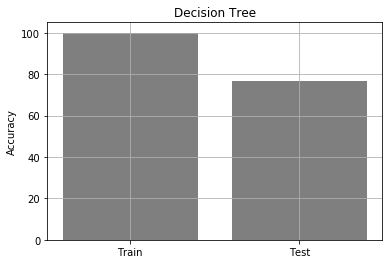

In [56]:
models = ('Train', 'Test')
y_pos = np.arange(len(models))
accuracy = [accuracy_dt_train*100, accuracy_dt_test*100]

plt.bar(y_pos, accuracy, align='center', alpha=0.5, color = 'black')
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')
plt.title('Decision Tree')
plt.grid(True)

plt.show()

### Gradient Boost

In [57]:
model_gb = GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.01,
                                      n_estimators = 10, max_depth = 5,
                                      random_state= 42)
model_gb.fit(X_train, y_train)

X_train_pred = model_gb.predict(X_train)
confusion_matrix(y_train, X_train_pred)

array([[29905,     0],
       [ 8536,     0]], dtype=int64)

In [58]:
accuracy_gb_train = accuracy_score(y_train, X_train_pred)
print("accuracy on training set: ", accuracy_gb_train)

accuracy on training set:  0.777945422855805


In [59]:
X_test_pred = model_gb.predict(X_test)
confusion_matrix(y_test, X_test_pred)

array([[9419,    0],
       [2595,    0]], dtype=int64)

In [60]:
accuracy_gb_test = accuracy_score(y_test, X_test_pred)
print("accuracy on test set: ", accuracy_gb_test)

accuracy on test set:  0.7840019976693857


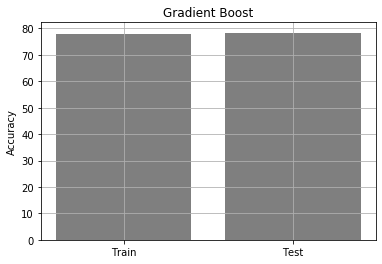

In [61]:
models = ('Train', 'Test')
y_pos = np.arange(len(models))
accuracy = [accuracy_gb_train*100, accuracy_gb_test*100]

plt.bar(y_pos, accuracy, align='center', alpha=0.5, color = 'black')
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')
plt.title('Gradient Boost')
plt.grid(True)

plt.show()

### XGBoost Classifier

In [62]:
model_xgb = XGBClassifier(loss = 'deviance',
                                          learning_rate = 0.01,
                                          n_estimators = 10,
                                          max_depth = 5,
                                          random_state=42,
                                          nthread = -1)
model_xgb.fit(X_train, y_train)

X_train_pred = model_xgb.predict(X_train)
confusion_matrix(y_train, X_train_pred)

array([[28704,  1201],
       [ 5381,  3155]], dtype=int64)

In [63]:
accuracy_xgb_train = accuracy_score(y_train, X_train_pred)
print("accuracy on training set: ", accuracy_xgb_train)

accuracy on training set:  0.8287765666866107


In [64]:
X_test_pred = model_xgb.predict(X_test)
confusion_matrix(y_test, X_test_pred)

array([[9032,  387],
       [1752,  843]], dtype=int64)

In [65]:
accuracy_xgb_test = accuracy_score(y_test, X_test_pred)
print("accuracy on test set: ", accuracy_xgb_test)

accuracy on test set:  0.8219577159980024


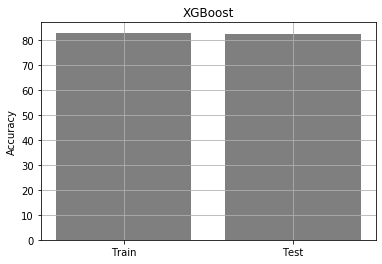

In [66]:
models = ('Train', 'Test')
y_pos = np.arange(len(models))
accuracy = [accuracy_xgb_train*100, accuracy_xgb_test*100]

plt.bar(y_pos, accuracy, align='center', alpha=0.5, color = 'black')
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')
plt.title('XGBoost')
plt.grid(True)

plt.show()

### KNN

In [67]:
model_knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance',
                                 algorithm = 'auto', n_jobs = -1)
model_knn.fit(X_train, y_train)

X_train_pred = model_knn.predict(X_train)
confusion_matrix(y_train, X_train_pred)

array([[29905,     0],
       [    0,  8536]], dtype=int64)

In [68]:
accuracy_knn_train = accuracy_score(y_train, X_train_pred)
print("accuracy on training set: ", accuracy_knn_train)

accuracy on training set:  1.0


In [69]:
X_test_pred = model_knn.predict(X_test)
confusion_matrix(y_test, X_test_pred)

array([[8462,  957],
       [1439, 1156]], dtype=int64)

In [70]:
accuracy_knn_test = accuracy_score(y_test, X_test_pred)
print("accuracy on test set: ", accuracy_knn_test)

accuracy on test set:  0.8005660063259531


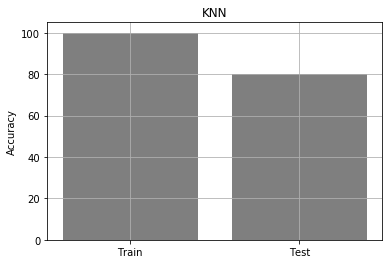

In [71]:
models = ('Train', 'Test')
y_pos = np.arange(len(models))
accuracy = [accuracy_knn_train*100, accuracy_knn_test*100]

plt.bar(y_pos, accuracy, align='center', alpha=0.5, color = 'black')
plt.xticks(y_pos, models)
plt.ylabel('Accuracy')
plt.title('KNN')
plt.grid(True)

plt.show()

# Comparison

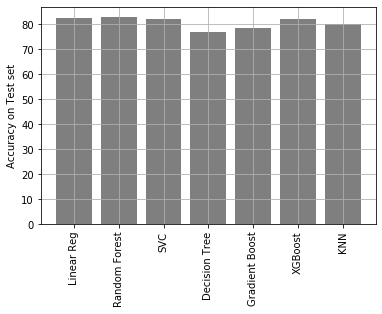

In [72]:
models = ('Linear Reg', 'Random Forest', 'SVC', 'Decision Tree', 'Gradient Boost', 'XGBoost', 'KNN')
y_pos = np.arange(len(models))
accuracy = [accuracy_lr_test*100, accuracy_rfc_test*100, accuracy_svm_test*100, accuracy_dt_test*100, accuracy_gb_test*100, accuracy_xgb_test*100, accuracy_knn_test*100]

plt.bar(y_pos, accuracy, align='center', alpha=0.5, color = 'black')
plt.xticks(y_pos, models)
plt.ylabel('Accuracy on Test set')
plt.grid(True)
plt.xticks(rotation=90)

plt.show()